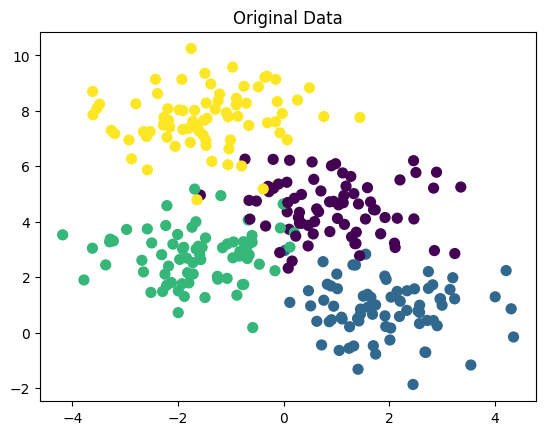

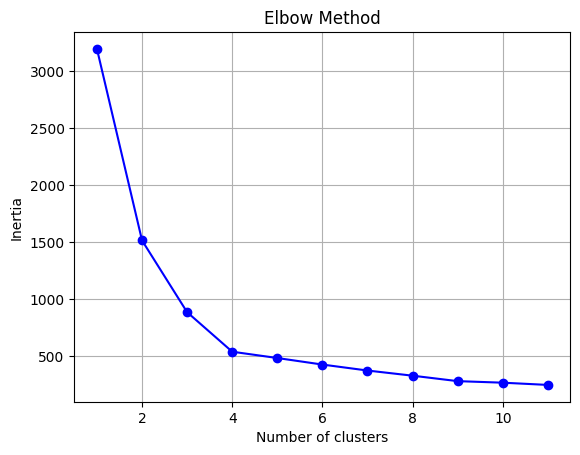

For n_clusters=2, silhouette score=0.448
For n_clusters=3, silhouette score=0.457
For n_clusters=4, silhouette score=0.501
For n_clusters=5, silhouette score=0.437
For n_clusters=6, silhouette score=0.381


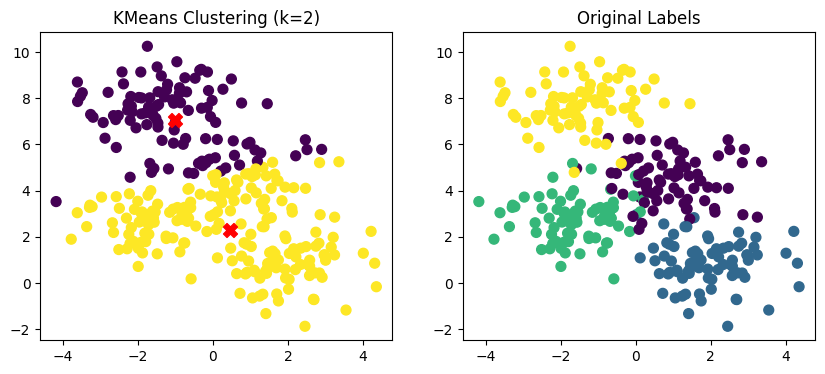

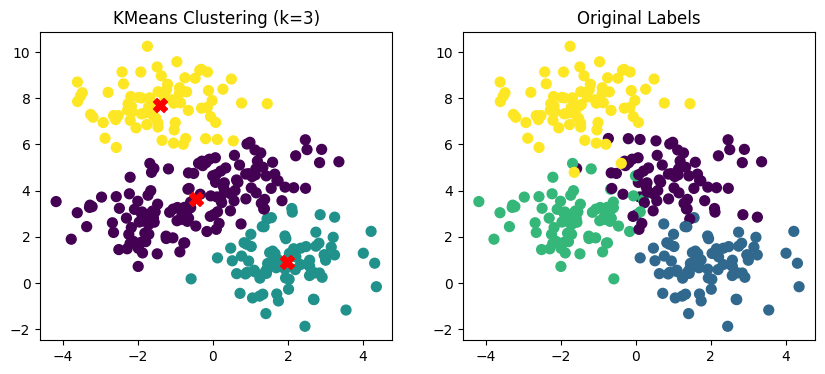

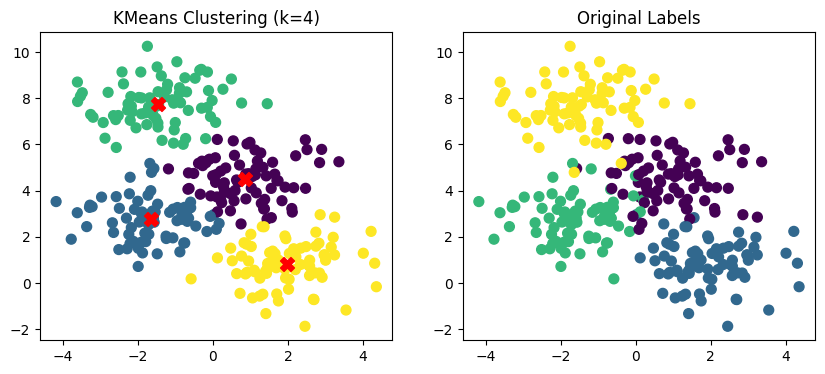

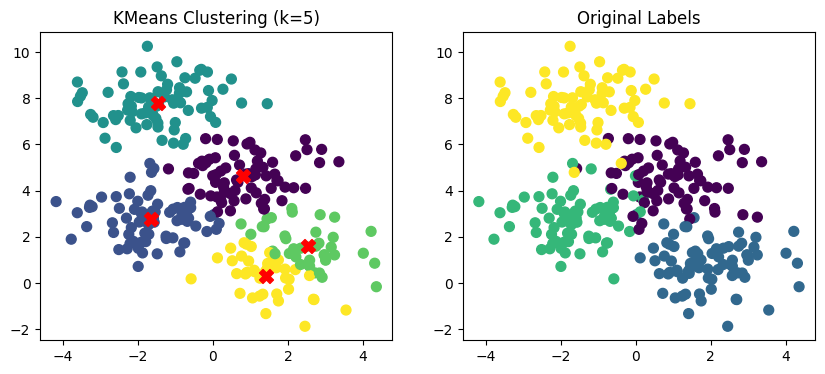

In [1]:
# K-means Clustering (оптимізована версія з коментарями)

import numpy as np  # Імпорт бібліотеки для роботи з масивами
import matplotlib.pyplot as plt  # Імпорт бібліотеки для візуалізації
from sklearn.datasets import make_blobs  # Імпорт функції для генерації тестових даних
from sklearn.cluster import KMeans  # Імпорт алгоритму K-means
from sklearn.metrics import silhouette_score  # Імпорт метрики для оцінки якості кластеризації

# ----------------------------
# Генерація даних
# ----------------------------
X, y_true = make_blobs(
    n_samples=300,       # Кількість точок
    n_features=2,        # Кількість ознак (вимірів)
    centers=4,           # Кількість центрів/кластерів
    cluster_std=1,       # Стандартне відхилення для розсіювання точок
    random_state=0       # Фіксований seed для відтворюваності результатів
)

# Відображення згенерованих даних
plt.scatter(X[:,0], X[:,1], c=y_true, cmap='viridis', s=50)  # Кольоруємо точки відповідно до справжніх кластерів
plt.title("Original Data")  # Заголовок графіку
plt.show()  # Показати графік

# ----------------------------
# Elbow method (метод ліктя для вибору k)
# ----------------------------
errors = []  # Список для збереження значень інерції
K_range = range(1, 12)  # Перевіряємо k від 1 до 11
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)  # Ініціалізація KMeans
    kmeans.fit(X)  # Навчання моделі
    errors.append(kmeans.inertia_)  # Додаємо інерцію (суму квадратів відстаней до центру) у список

# Візуалізація методу "ліктя"
plt.plot(K_range, errors, 'o-', color='blue')  # Графік залежності інерції від кількості кластерів
plt.xlabel("Number of clusters")  # Підпис осі X
plt.ylabel("Inertia")  # Підпис осі Y
plt.title("Elbow Method")  # Заголовок графіку
plt.grid(True)  # Додати сітку на графік
plt.show()  # Показати графік

# ----------------------------
# Silhouette scores (оцінка якості кластеризації)
# ----------------------------
for k in range(2, 7):  # Перевіряємо k від 2 до 6
    kmeans = KMeans(n_clusters=k, random_state=0)  # Ініціалізація KMeans
    labels = kmeans.fit_predict(X)  # Навчання і отримання міток кластерів
    score = silhouette_score(X, labels)  # Розрахунок середнього коефіцієнта силуету
    print(f"For n_clusters={k}, silhouette score={score:.3f}")  # Вивід результату

# ----------------------------
# Функція для візуалізації кластерів
# ----------------------------
def plot_clusters(X, n_clusters, true_labels=None):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)  # Ініціалізація KMeans
    labels = kmeans.fit_predict(X)  # Навчання та отримання міток кластерів
    centers = kmeans.cluster_centers_  # Отримання координат центрів кластерів

    plt.figure(figsize=(10,4))  # Створюємо фігуру для графіків

    # Кластери KMeans
    plt.subplot(1,2,1)  # Лівий графік
    plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50)  # Візуалізація точок за кластером
    plt.scatter(centers[:,0], centers[:,1], c='red', s=100, marker='X')  # Центри кластерів
    plt.title(f"KMeans Clustering (k={n_clusters})")  # Заголовок графіку

    # Оригінальні дані
    plt.subplot(1,2,2)  # Правий графік
    if true_labels is not None:
        plt.scatter(X[:,0], X[:,1], c=true_labels, cmap='viridis', s=50)  # Візуалізація справжніх міток
    else:
        plt.scatter(X[:,0], X[:,1], s=50)  # Якщо справжніх міток немає
    plt.title("Original Labels")  # Заголовок графіку

    plt.show()  # Показати графік

# ----------------------------
# Приклади кластеризації з різною кількістю кластерів
# ----------------------------
for k in [2, 3, 4, 5]:
    plot_clusters(X, n_clusters=k, true_labels=y_true)  # Виклик функції для візуалізації
